<a href="https://colab.research.google.com/github/prathammehta16/ML_University_Course/blob/main/20IT068_ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##20IT068

##Practical 7

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train_copy = x_train

In [5]:
x_train.shape

(60000, 28, 28)

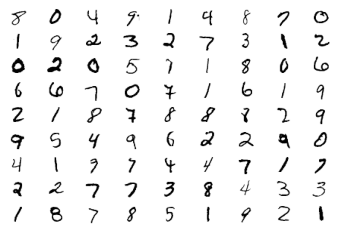

In [8]:
for i in range(81):
    ax = plt.subplot(9, 9, i+1)
    ax.axis('off')
    plt.imshow(x_train_copy[randint(0, x_train.shape[0])], cmap='Greys')

In [9]:
image_size = 784 
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

In [10]:
num_classes=10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [11]:
print(x_train.shape)

(60000, 784)


In [12]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/5
422/422 [==============================] - 7s 3ms/step - loss: 1.4105 - accuracy: 0.6289 - val_loss: 0.9577 - val_accuracy: 0.8152
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 0.8687 - accuracy: 0.8179 - val_loss: 0.6923 - val_accuracy: 0.8737
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 0.6712 - accuracy: 0.8576 - val_loss: 0.5495 - val_accuracy: 0.8898
Epoch 4/5
422/422 [==============================] - 1s 3ms/step - loss: 0.5712 - accuracy: 0.8743 - val_loss: 0.4754 - val_accuracy: 0.9065
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.8933


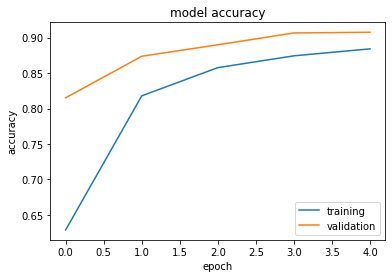

Test loss: 0.468
Test accuracy: 0.893


In [15]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [18]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


**Different number of hidden layers**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                25120     
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


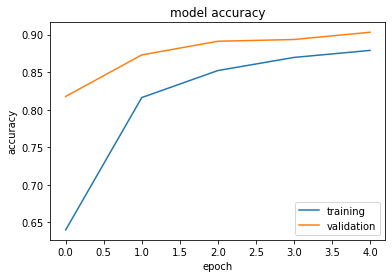


Test loss: 0.491
Test accuracy: 0.889
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


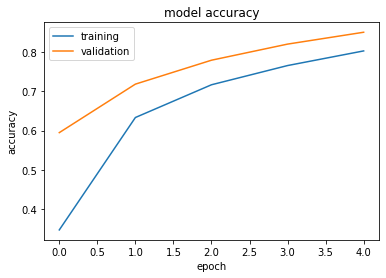


Test loss: 1.16
Test accuracy: 0.819
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                25120     
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


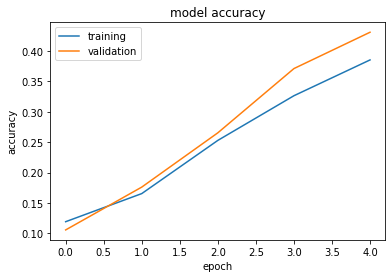


Test loss: 2.13
Test accuracy: 0.425


In [20]:
for layers in range(1, 4):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                25120     
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 32,042
Trainable params: 32,042
Non-trainable params: 0
_________________________________________________________________


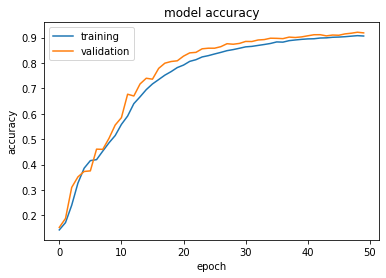


Test loss: 0.358
Test accuracy: 0.906


In [21]:
model = create_dense([32, 64, 64])
evaluate(model, epochs=50)

##Increasing number of nodes per layer

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                25120     
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


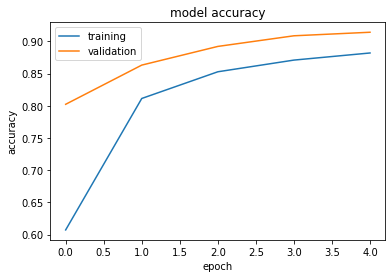


Test loss: 0.484
Test accuracy: 0.893
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                50240     
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


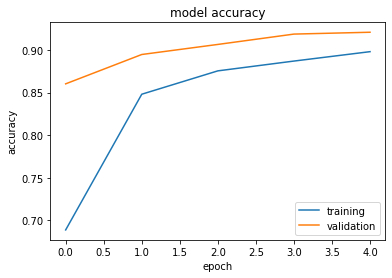


Test loss: 0.388
Test accuracy: 0.905
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


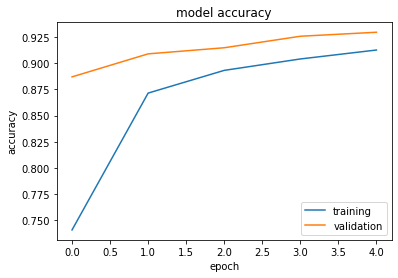


Test loss: 0.311
Test accuracy: 0.918
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               200960    
                                                                 
 dense_29 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


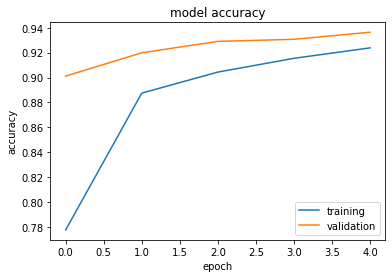


Test loss: 0.271
Test accuracy: 0.925
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               401920    
                                                                 
 dense_31 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


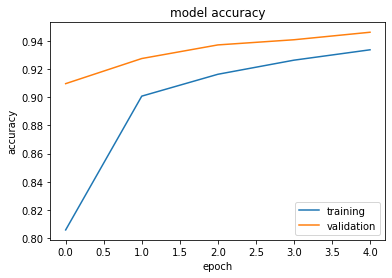


Test loss: 0.238
Test accuracy: 0.936
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1024)              803840    
                                                                 
 dense_33 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


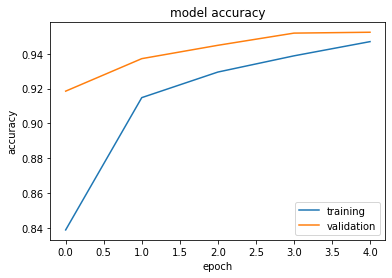


Test loss: 0.208
Test accuracy: 0.939


In [22]:
for nodes in [32, 64, 128, 256, 512, 1024]:
    model = create_dense([nodes])
    evaluate(model)

## More Nodes And More Layers

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                50240     
                                                                 
 dense_35 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


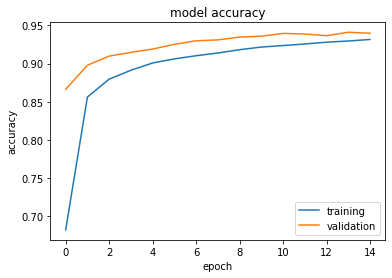


Test loss: 0.26
Test accuracy: 0.93
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                50240     
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


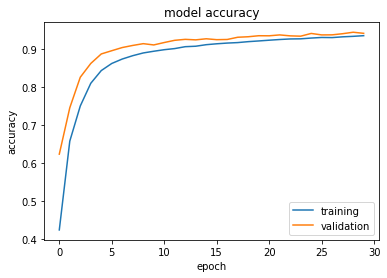


Test loss: 0.254
Test accuracy: 0.927
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                50240     
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


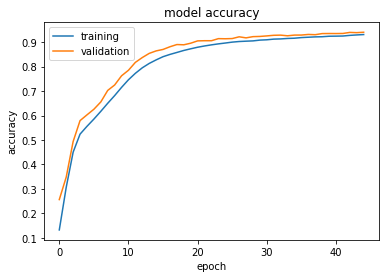


Test loss: 0.278
Test accuracy: 0.927
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                50240     
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


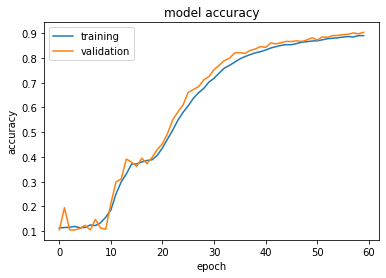


Test loss: 0.456
Test accuracy: 0.89


In [23]:
nodes_per_layer = 64
for layers in [1, 2, 3, 4]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=15*layers)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 512)               401920    
                                                                 
 dense_49 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


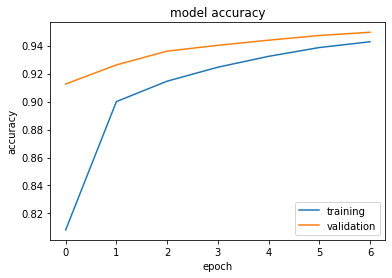


Test loss: 0.217
Test accuracy: 0.939
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 512)               401920    
                                                                 
 dense_51 (Dense)            (None, 512)               262656    
                                                                 
 dense_52 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


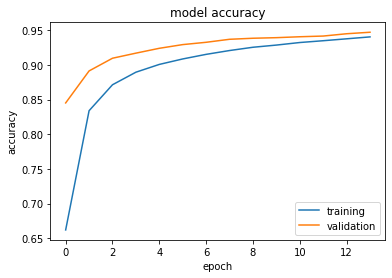


Test loss: 0.23
Test accuracy: 0.936
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 512)               401920    
                                                                 
 dense_54 (Dense)            (None, 512)               262656    
                                                                 
 dense_55 (Dense)            (None, 512)               262656    
                                                                 
 dense_56 (Dense)            (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


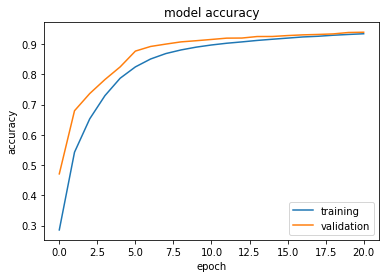


Test loss: 0.257
Test accuracy: 0.928
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 512)               401920    
                                                                 
 dense_58 (Dense)            (None, 512)               262656    
                                                                 
 dense_59 (Dense)            (None, 512)               262656    
                                                                 
 dense_60 (Dense)            (None, 512)               262656    
                                                                 
 dense_61 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


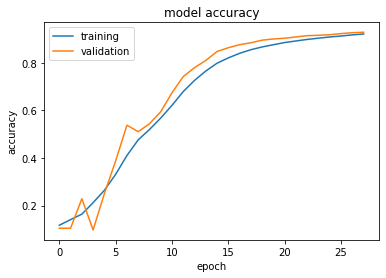


Test loss: 0.325
Test accuracy: 0.915


In [24]:
nodes_per_layer = 512
for layers in [1, 2, 3, 4]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=7*layers)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_63 (Dense)            (None, 10)                20490     
                                                                 
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


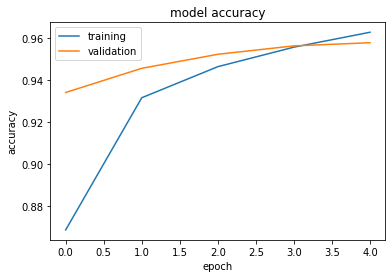


Test loss: 0.177
Test accuracy: 0.949
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_65 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_66 (Dense)            (None, 10)                20490     
                                                                 
Total params: 5,824,522
Trainable params: 5,824,522
Non-trainable params: 0
_________________________________________________________________


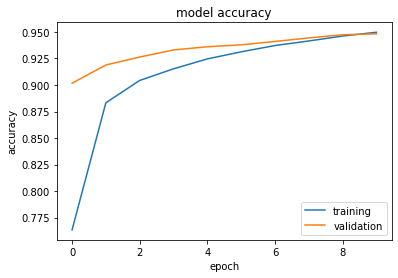


Test loss: 0.214
Test accuracy: 0.939
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_68 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_69 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_70 (Dense)            (None, 10)                20490     
                                                                 
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________


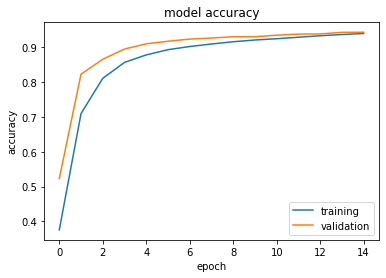


Test loss: 0.243
Test accuracy: 0.929
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_72 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_73 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_74 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_75 (Dense)            (None, 10)                20490     
                                                                 
Total params: 14,217,226
Trainable params: 14,217,226
Non-trainable params: 0
_________________________________________________________________


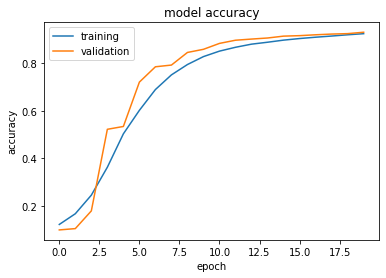


Test loss: 0.307
Test accuracy: 0.914


In [25]:
nodes_per_layer = 2048
for layers in [1, 2, 3, 4]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=5*layers)

**Decreasing the batch size**

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 32)                25120     
                                                                 
 dense_83 (Dense)            (None, 32)                1056      
                                                                 
 dense_84 (Dense)            (None, 32)                1056      
                                                                 
 dense_85 (Dense)            (None, 32)                1056      
                                                                 
 dense_86 (Dense)            (None, 32)                1056      
                                                                 
 dense_87 (Dense)            (None, 10)                330       
                                                                 
Total params: 29,674
Trainable params: 29,674
Non-tra

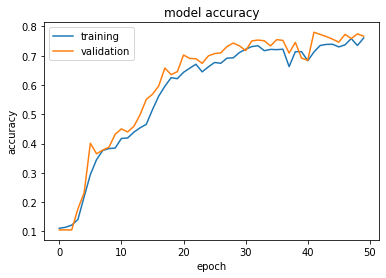


Test loss: 0.776
Test accuracy: 0.756


In [27]:
model = create_dense([32] * 5)
evaluate(model, batch_size=10, epochs=50)